Loaded 3245 items


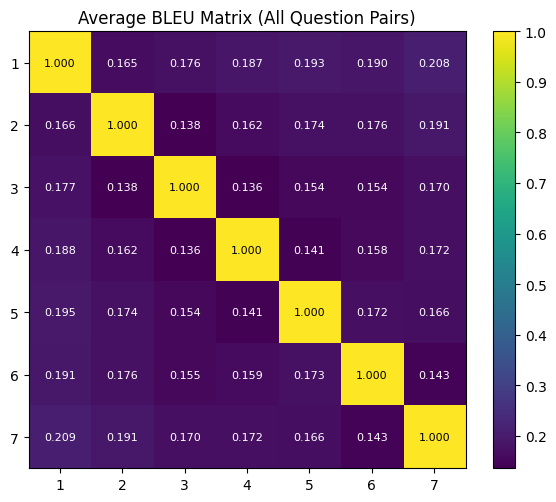

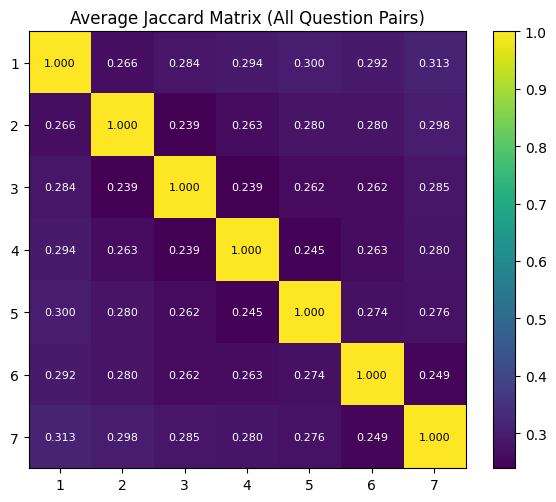


===== GLOBAL METRICS ACROSS ALL COMPARISONS =====
Max BLEU:      0.9535
Min BLEU:      0.0000
Max Jaccard:   0.9706
Min Jaccard:   0.0000



In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sacrebleu.metrics import BLEU

jsonl_path = "/Users/essajan/Desktop/CS2951-C/BATS Project/extracted_and_rephrased_QA/Rephrased_QA.jsonl"
data = []

with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line:
            data.append(json.loads(line))

print("Loaded", len(data), "items")

bleu = BLEU(effective_order=True)

def get_questions(entry):
    return [
        entry["question"],
        entry["rephrased_1"],
        entry["rephrased_2"],
        entry["rephrased_3"],
        entry["rephrased_4"],
        entry["rephrased_5"],
        entry["rephrased_6"],
    ]

def jaccard(a, b):
    s1, s2 = set(a.lower().split()), set(b.lower().split())
    return len(s1 & s2) / len(s1 | s2)

def bleu_score(a, b):
    return bleu.sentence_score(a, [b]).score / 100

BLEU_sum = np.zeros((7, 7))
JAC_sum  = np.zeros((7, 7))

all_bleu_values = []
all_jac_values  = []

for item in data:
    qs = get_questions(item)

    bleu_matrix = np.zeros((7, 7))
    jac_matrix  = np.zeros((7, 7))

    for i in range(7):
     for j in range(7):
        if i == j:
            bleu_matrix[i][j] = 1.0
            jac_matrix[i][j]  = 1.0
        else:
            b = bleu_score(qs[i], qs[j])
            jac_val = jaccard(qs[i], qs[j])  # rename variable
            bleu_matrix[i][j] = b
            jac_matrix[i][j]  = jac_val

            all_bleu_values.append(b)
            all_jac_values.append(jac_val)

    BLEU_sum += bleu_matrix
    JAC_sum  += jac_matrix


BLEU_avg = BLEU_sum / len(data)
JAC_avg  = JAC_sum  / len(data)


def show_heatmap(matrix, title):
    plt.figure(figsize=(6, 5))
    plt.imshow(matrix, interpolation='nearest')
    plt.colorbar()

    plt.xticks(range(7), range(1, 8))
    plt.yticks(range(7), range(1, 8))
    plt.title(title)

    # Annotate values
    for i in range(7):
        for j in range(7):
            value = matrix[i, j]
            if i == j:  # Skip diagonal
                plt.text(j, i, f"{value:.3f}",
                        ha='center', va='center',
                        fontsize=8, color='black')
            else:
                plt.text(j, i, f"{value:.3f}",
                        ha='center', va='center',
                        fontsize=8, color='white')

    plt.tight_layout()
    plt.show()


show_heatmap(BLEU_avg, "Average BLEU Matrix (All Question Pairs)")
show_heatmap(JAC_avg,  "Average Jaccard Matrix (All Question Pairs)")


print("\n===== GLOBAL METRICS ACROSS ALL COMPARISONS =====")
print(f"Max BLEU:      {max(all_bleu_values):.4f}")
print(f"Min BLEU:      {min(all_bleu_values):.4f}")
print(f"Max Jaccard:   {max(all_jac_values):.4f}")
print(f"Min Jaccard:   {min(all_jac_values):.4f}")
print("=================================================\n")


In [21]:
# Store high-value comparisons
bleu_high_pairs = []
jac_high_pairs  = []

for item_idx, item in enumerate(data):
    qs = get_questions(item)
    for i in range(7):
        for j in range(7):
            if i != j:
                b = bleu_score(qs[i], qs[j])
                jac_val = jaccard(qs[i], qs[j])
                
                if b > 0.90:
                    bleu_high_pairs.append((item_idx+1, i+1, j+1, b, qs[i], qs[j]))
                if jac_val > 0.90:
                    jac_high_pairs.append((item_idx+1, i+1, j+1, jac_val, qs[i], qs[j]))

# Print first 5 examples for each
print("\n=== BLEU > 0.90 Examples ===")
for e in bleu_high_pairs[:5]:
    print(f"Item {e[0]}, Q{i}->{j}: BLEU={e[3]:.3f}\n  Q{i}: {e[4]}\n  Q{j}: {e[5]}\n")

print("\n=== Jaccard > 0.90 Examples ===")
for e in jac_high_pairs[:5]:
    print(f"Item {e[0]}, Q{i}->{j}: Jaccard={e[3]:.3f}\n  Q{i}: {e[4]}\n  Q{j}: {e[5]}\n")



=== BLEU > 0.90 Examples ===
Item 19, Q6->6: BLEU=0.933
  Q6: Which major financial venture was initiated by Betagro, a key player in the Thai meat industry, in the month of November in the year twenty twenty-four?
  Q6: 3. Which major financial venture was initiated by Betagro, a key player in the Thai meat industry, in the month of November in the year twenty twenty-four?

Item 19, Q6->6: BLEU=0.932
  Q6: 3. Which major financial venture was initiated by Betagro, a key player in the Thai meat industry, in the month of November in the year twenty twenty-four?
  Q6: Which major financial venture was initiated by Betagro, a key player in the Thai meat industry, in the month of November in the year twenty twenty-four?

Item 45, Q6->6: BLEU=0.923
  Q6: What specific information was shared by the North Carolina Senator Thom Tillis regarding his career in politics on July the first, twenty twenty-five?
  Q6: 4. What specific information was shared by the North Carolina Senator Thom Tillis 